In [ ]:
from google.colab import drive
drive.mount('/content/drive')

default_path = '/content/drive/My Drive'
sub_folder = '/MS AI School/21DAY(이미지 분류)/'

my_path = default_path + sub_folder

Mounted at /content/drive


In [ ]:
import os
import shutil
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Original Data Path

In [ ]:
original_dataset_dir = my_path + 'datasets/cats_and_dogs/train'

# Small Dataset Path

In [ ]:
base_dir = my_path + 'datasets/cats_and_dogs_small'

if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
    
os.mkdir(base_dir)

# Train, Validation, Test data

In [ ]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)
os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

# File copy

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)     # 원본 경로
    dst = os.path.join(train_cats_dir, fname)           # 복사할 경로
    
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)     # 원본 경로
    dst = os.path.join(train_dogs_dir, fname)           # 복사할 경로
    
    shutil.copyfile(src, dst)

print('copy completed')

copy completed


In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)         # 원본 경로
    dst = os.path.join(validation_cats_dir, fname)          # 복사할 경로
    
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)         # 원본 경로
    dst = os.path.join(validation_dogs_dir, fname)          # 복사할 경로
    
    shutil.copyfile(src, dst)

print('copy completed')

copy completed


In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)         # 원본 경로
    dst = os.path.join(test_cats_dir, fname)                # 복사할 경로
    
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)         # 원본 경로
    dst = os.path.join(test_dogs_dir, fname)                # 복사할 경로
    
    shutil.copyfile(src, dst)

print('copy completed')

copy completed


In [ ]:
print('Train cat images         :', len(os.listdir(train_cats_dir)))
print('Train dog images         :', len(os.listdir(train_dogs_dir)))
print()
print('Validation cat images    :', len(os.listdir(validation_cats_dir)))
print('Validation dog images    :', len(os.listdir(validation_dogs_dir)))
print()
print('Test cat images          :', len(os.listdir(test_cats_dir)))
print('Test dog images          :', len(os.listdir(test_dogs_dir)))

Train cat images         : 1000
Train dog images         : 1000

Validation cat images    : 500
Validation dog images    : 500

Test cat images          : 500
Test dog images          : 500


# Build network

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model  = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

# Compile

In [ ]:
from tensorflow.keras import optimizers

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Data Preprocessing

## Image Scaling

In [ ]:
# Image Scaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

test_generator = train_datagen.flow_from_directory(test_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
train_generator

In [ ]:
for data_batch, labels_batsh in train_generator:
    print('Batch Data Size      :', data_batch.shape)
    print('Batch Label Size     :', labels_batsh)
    break

Batch Data Size      : (20, 150, 150, 3)
Batch Label Size     : [0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0.]


In [ ]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data=test_generator,
                             validation_steps=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/30
100/100 [==============================] - 22s 130ms/step - loss: 0.8252 - accuracy: 0.5095 - val_loss: 0.6981 - val_accuracy: 0.5000
Epoch 2/30
100/100 [==============================] - 13s 129ms/step - loss: 0.7007 - accuracy: 0.5540 - val_loss: 0.6597 - val_accuracy: 0.5900
Epoch 3/30
100/100 [==============================] - 13s 131ms/step - loss: 0.6738 - accuracy: 0.6415 - val_loss: 0.6207 - val_accuracy: 0.6410
Epoch 4/30
100/100 [==============================] - 13s 131ms/step - loss: 0.6050 - accuracy: 0.6760 - val_loss: 0.5999 - val_accuracy: 0.6670
Epoch 5/30
100/100 [==============================] - 13s 129ms/step - loss: 0.5604 - accuracy: 0.7210 - val_loss: 0.6041 - val_accuracy: 0.6690
Epoch 6/30
100/100 [==============================] - 15s 153ms/step - loss: 0.5256 - accuracy: 0.7395 - val_loss: 0.7180 - val_accuracy: 0.6430
Epoch 7/30
100/100 [==============================] - 14s 136ms/step - loss: 0.4806 - accuracy: 0.7770 - val_loss: 0.6505 - val_ac

# Save Model

In [ ]:
model.save(base_dir + '/cats_and_dogs_small_1.0.h5')

# Visualize

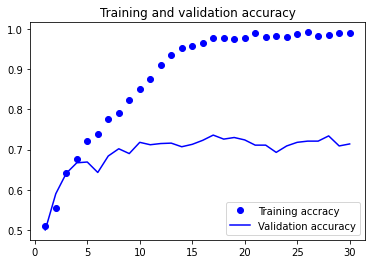

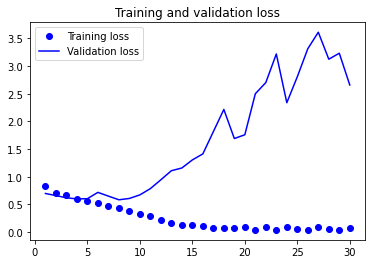

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
vallid_accuracy = history.history['val_accuracy']
loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training accracy')
plt.plot(epochs, vallid_accuracy, 'b-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, valid_loss, 'b-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

# Data Augmentation

In [ ]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

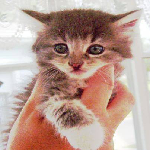

In [ ]:
from tensorflow.keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
img

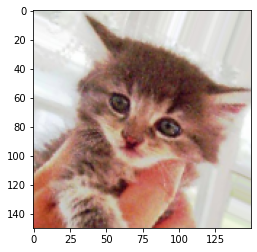

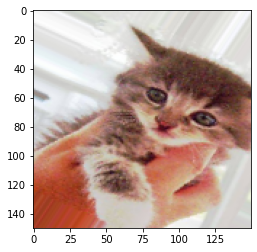

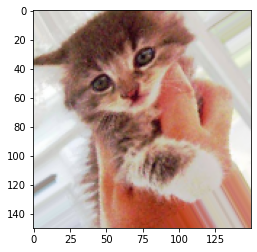

In [ ]:
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    
    i += 1
    if i % 3 == 0:
        break

plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)                               # 검증 데이터는 증식되어서는 안 됩니다!

train_generator = train_datagen.flow_from_directory(train_dir,                  # 타깃 디렉터리        
                                                    target_size=(150, 150),     # 모든 이미지를 150 × 150 크기로 바꿉니다        
                                                    batch_size=32,              # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다        
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=10,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 0.6151 - accuracy: 0.6625

10/10 [==============================] - 7s 759ms/step - loss: 0.6151 - accuracy: 0.6625 - val_loss: 0.5938 - val_accuracy: 0.6760
Epoch 2/100
10/10 [==============================] - 3s 286ms/step - loss: 0.5776 - accuracy: 0.6812
Epoch 3/100
10/10 [==============================] - 3s 269ms/step - loss: 0.6120 - accuracy: 0.7138
Epoch 4/100
10/10 [==============================] - 3s 270ms/step - loss: 0.5881 - accuracy: 0.6974
Epoch 5/100
10/10 [==============================] - 4s 442ms/step - loss: 0.6104 - accuracy: 0.7063
Epoch 6/100
10/10 [==============================] - 3s 283ms/step - loss: 0.6212 - accuracy: 0.6969
Epoch 7/100
10/10 [==============================] - 3s 283ms/step - loss: 0.6197 - accuracy: 0.7171
Epoch 8/100
10/10 [==============================] - 3s 282ms/step - loss: 0.5309 - accuracy: 0.7281
Epoch 9/100
10/10 [==============================] - 3s 280ms/step - loss: 0.5627 - accuracy: 0.7406
Epoch 10/100
10/10 [==============================] - 3s 266m